# Nuveen Hackathon Big Query DS Insights

In [1]:
# 1. install google-cloud-sdk
# 2. gcloud init
# 3. bq init
# %pip install --upgrade google-auth google-cloud-bigquery

In [2]:
import os, sys
import pandas as pd

In [3]:
!export GOOGLE_APPLICATION_CREDENTIALS="/Users/hansel/hackathon/2019/nuveen/Hackathon2019-Nuveen-31af23960028.json"

In [4]:
GOOGLE_APPLICATION_CREDENTIALS="/Users/hansel/hackathon/2019/nuveen/Hackathon2019-Nuveen-31af23960028.json"

In [5]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(
    "/Users/hansel/hackathon/2019/nuveen/Hackathon2019-Nuveen-31af23960028.json")

scoped_credentials = credentials.with_scopes(
    ['https://www.googleapis.com/auth/cloud-platform'])

In [6]:
from google.cloud import bigquery

In [7]:
credentials = service_account.Credentials.from_service_account_file(
    GOOGLE_APPLICATION_CREDENTIALS,
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

In [8]:
client = bigquery.Client(
    credentials=credentials,
    project="hackathon2019-nuveen",
)

In [10]:
query = """
    SELECT distinct ev.globaleventid, monthyear, actor1name,actor2name,eventcode,goldsteinScale,numMentions,numArticles,AvgTone,MentionType,MentionIdentifier,Confidence,DocumentIdentifier,theme,themeRefCount from NuveenDataset.NuveenEvents ev,NuveenDataset.NuveenEventMentions evm,NuveenDataset.NuveenGKGTopNThemes gt where ev.GLOBALEVENTID=evm.GLOBALEVENTID and evm.MentionIdentifier=gt.DocumentIdentifier
"""

In [11]:
query_job = client.query(query)

In [12]:
df = (
    client.query(query).result().to_dataframe()
)
print(df.head())

   globaleventid  monthyear            actor1name           actor2name  \
0      702178861     201710             PRESIDENT  SECURITIES EXCHANGE   
1      596432101     201611                  BANK                 None   
2      596437588     201611             STARBUCKS                 None   
3      596459241     201611  OPPENHEIMER HOLDINGS                 None   
4      595571014     201610         UNITED STATES             CONGRESS   

  eventcode  goldsteinScale  numMentions  numArticles   AvgTone  MentionType  \
0       010             0.0            5            5  1.118012            1   
1       071             7.4           10           10  2.000000            1   
2       010             0.0            5            5  0.905797            1   
3       010             0.0           10           10  4.811715            1   
4       040             1.0            8            8 -1.346363            1   

                                   MentionIdentifier  Confidence  \
0  htt

In [13]:
df

,globaleventid,monthyear,actor1name,actor2name,eventcode,goldsteinScale,numMentions,numArticles,AvgTone,MentionType,MentionIdentifier,Confidence,DocumentIdentifier,theme,themeRefCount
0,702178861,201710,PRESIDENT,SECURITIES EXCHANGE,010,0.0,5,5,1.118012,1,http://bangaloreweekly.com/2017-10-29-bienvill...,50,http://bangaloreweekly.com/2017-10-29-bienvill...,TAX_FNCACT_ANALYSTS,3
1,596432101,201611,BANK,None,071,7.4,10,10,2.000000,1,http://dailyquint.com/2016-11-07-south-dakota-...,100,http://dailyquint.com/2016-11-07-south-dakota-...,TAX_FNCACT_OPERATOR,5
2,596437588,201611,STARBUCKS,None,010,0.0,5,5,0.905797,1,http://dailyquint.com/2016-11-07-south-dakota-...,100,http://dailyquint.com/2016-11-07-south-dakota-...,TAX_FNCACT_OPERATOR,5
3,596459241,201611,OPPENHEIMER HOLDINGS,None,010,0.0,10,10,4.811715,1,http://dailyquint.com/2016-11-07-south-dakota-...,100,http://dailyquint.com/2016-11-07-south-dakota-...,TAX_FNCACT_OPERATOR,5
4,595571014,201610,UNITED STATES,CONGRESS,040,1.0,8,8,-1.346363,1,http://delmarvapublicradio.net/post/trumps-odd...,40,http://delmarvapublicradio.net/post/trumps-odd...,TAX_ECON_PRICE,6
5,595279298,201611,UNITED STATES,None,010,0.0,4,4,2.857143,1,http://delmarvapublicradio.net/post/trumps-odd...,20,http://delmarvapublicradio.net/post/trumps-odd...,TAX_ECON_PRICE,6
6,595571776,201611,UNITED KINGDOM,NUVEEN,010,0.0,1,1,-1.376936,1,http://delmarvapublicradio.net/post/trumps-odd...,10,http://delmarvapublicradio.net/post/trumps-odd...,TAX_ECON_PRICE,6
7,595571777,201611,UNITED KINGDOM,NUVEEN,010,0.0,3,3,-1.376936,1,http://delmarvapublicradio.net/post/trumps-odd...,30,http://delmarvapublicradio.net/post/trumps-odd...,TAX_ECON_PRICE,6
8,595252328,201611,MICHIGAN,None,010,0.0,2,2,0.000000,1,http://delmarvapublicradio.net/post/trumps-odd...,20,http://delmarvapublicradio.net/post/trumps-odd...,TAX_ECON_PRICE,6
9,595571010,201610,CONGRESS,None,040,1.0,12,12,-1.346363,1,http://delmarvapublicradio.net/post/trumps-odd...,60,http://delmarvapublicradio.net/post/trumps-odd...,TAX_ECON_PRICE,6


In [27]:
df.to_csv("nuveen_sigfeatures_joined.csv")

In [14]:
import sklearn
import numpy as np

In [15]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [16]:
PROJECT_ROOT_DIR = "."

In [17]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [18]:
corr_matrix = df.corr()

In [19]:
corr_matrix

,globaleventid,monthyear,goldsteinScale,numMentions,numArticles,AvgTone,MentionType,Confidence,themeRefCount
globaleventid,1.000000,0.979139,0.058155,0.017989,0.021368,0.227757,NaN,0.147654,-0.028105
monthyear,0.979139,1.000000,0.060137,0.022666,0.027090,0.208082,NaN,0.139842,-0.039354
goldsteinScale,0.058155,0.060137,1.000000,-0.024748,-0.025912,0.084443,NaN,-0.009834,-0.018925
numMentions,0.017989,0.022666,-0.024748,1.000000,0.973291,-0.005168,NaN,0.362363,-0.015719
numArticles,0.021368,0.027090,-0.025912,0.973291,1.000000,-0.011012,NaN,0.372952,-0.021889
AvgTone,0.227757,0.208082,0.084443,-0.005168,-0.011012,1.000000,NaN,0.164031,-0.064321
MentionType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confidence,0.147654,0.139842,-0.009834,0.362363,0.372952,0.164031,NaN,1.000000,-0.066193
themeRefCount,-0.028105,-0.039354,-0.018925,-0.015719,-0.021889,-0.064321,NaN,-0.066193,1.000000


In [20]:
import seaborn as sns

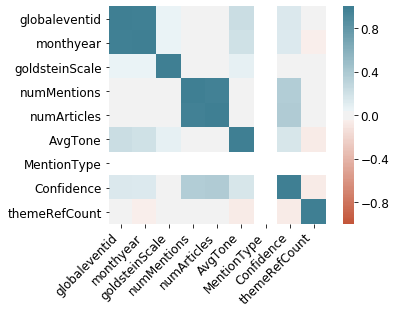

In [21]:
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [22]:
corr_matrix.to_csv("events_corr_1.csv")

In [23]:
df.describe()

,globaleventid,monthyear,goldsteinScale,numMentions,numArticles,AvgTone,MentionType,Confidence,themeRefCount
count,7.012800e+04,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.0,70128.000000,70128.000000
mean,7.443796e+08,201783.942291,2.285939,9.219000,8.954940,0.297701,1.0,67.692505,6.294490
std,1.468761e+08,142.422134,3.934695,9.272427,8.624524,2.583593,0.0,32.932629,6.484995
min,4.105872e+08,200606.000000,-10.000000,1.000000,1.000000,-16.666667,1.0,10.000000,1.000000
25%,6.228790e+08,201701.000000,0.000000,4.000000,4.000000,-1.015228,1.0,40.000000,3.000000
50%,7.960289e+08,201810.000000,0.400000,10.000000,10.000000,0.738916,1.0,70.000000,5.000000
75%,8.772110e+08,201910.000000,7.000000,10.000000,10.000000,1.710376,1.0,100.000000,8.000000
max,8.920502e+08,201912.000000,10.000000,360.000000,360.000000,15.384615,1.0,100.000000,167.000000


In [24]:
from pandas.plotting import scatter_matrix

In [25]:
# IMAGES_PATH = "."
# attributes = ["monthyear", "goldsteinScale", "numMentions","numArticles","AvgTone","MentionType","Confidence","themeRefCount"]
# scatter_matrix(df[attributes], figsize=(124, 116))
# save_fig("scatter_matrix_plot")

In [41]:
df_avgtone_monthyear = df[["AvgTone", "monthyear", "numMentions"]].copy()

In [42]:
df_avgtone_monthyear

,AvgTone,monthyear,numMentions
0,1.118012,201710,5
1,2.000000,201611,10
2,0.905797,201611,5
3,4.811715,201611,10
4,-1.346363,201610,8
5,2.857143,201611,4
6,-1.376936,201611,1
7,-1.376936,201611,3
8,0.000000,201611,2
9,-1.346363,201610,12


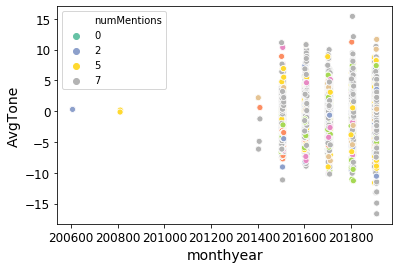

In [52]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="monthyear", y="AvgTone", data=df_avgtone_monthyear, hue="numMentions", palette="Set2", sizes=(20, 500), hue_norm=(0, 7),)

In [54]:
query = """
   SELECT *  FROM `hackathon2019-nuveen.NuveenDataset.NuveenEvents`;
"""

In [55]:
query_job = client.query(query)

In [56]:
df = (
    client.query(query).result().to_dataframe()
)

In [57]:
df

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,885133316,20191108,201911,2019,2019.8438,BUS,BUSINESS,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20191108000000,https://www.businessinsider.com/how-to-set-up-...
1,766702058,20180624,201806,2018,2018.4767,MNCUSA,MICROSOFT,USA,None,None,...,0,None,None,None,None,NaN,NaN,None,20180624004500,https://www.zdnet.com/article/microsoft-unexpe...
2,884652345,20191106,201911,2019,2019.8384,MNC,SHIP FINANCE INTERNATIONAL,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20191106023000,https://www.wkrb13.com/2019/11/06/ship-finance...
3,701782209,20171028,201710,2017,2017.8164,MNCUSA,FTI CONSULTING INC,USA,None,None,...,0,None,None,None,None,NaN,NaN,None,20171028010000,https://www.dailypolitical.com/2017/10/27/fti-...
4,587995658,20161012,201610,2016,2016.7726,BUS,BUSINESS,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20161012000000,http://www.business2community.com/human-resour...
5,880912857,20191020,201910,2019,2019.7945,BUS,COMPANY,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20191020000000,https://www.wkrb13.com/2019/10/19/1-65-earning...
6,884375623,20191105,201911,2019,2019.8356,BUS,INDUSTRY,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20191105003000,https://news.yahoo.com/twistles-16-million-fin...
7,880321598,20191017,201910,2019,2019.7863,MNCUSAHLH,ABBOTT LABORATORIES,USA,None,None,...,0,None,None,None,None,NaN,NaN,None,20191017101500,https://www.wkrb13.com/2019/10/17/cerebellum-g...
8,847457350,20190524,201905,2019,2019.3945,BUS,COMPANY,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20190524001500,https://news.yahoo.com/institutions-own-grange...
9,678487772,20170804,201708,2017,2017.5863,BUS,COMPANIES,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20170804000000,http://www.crainsdetroit.com/article/20170803/...


In [58]:
df.describe()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,IsRootEvent,QuadClass,GoldsteinScale,NumMentions,NumSources,...,Actor1Geo_Type,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED
count,2.375600e+04,2.375600e+04,23756.000000,23756.000000,23756.000000,23756.000000,23756.000000,23756.000000,23756.000000,23756.000000,...,23756.000000,19678.000000,19678.000000,23756.000000,8562.000000,8562.000000,23756.000000,20669.000000,20669.000000,2.375600e+04
mean,7.437772e+08,2.017835e+07,201783.354184,2017.756230,2018.349918,0.629357,1.511323,2.292667,9.213841,1.269742,...,1.595092,37.222437,-66.157075,0.725838,36.514240,-56.462708,1.679113,37.288426,-65.258787,2.017844e+13
std,1.468988e+08,1.424392e+04,142.434042,1.418157,1.489774,0.482987,0.736456,3.934802,9.272151,0.853620,...,1.151759,14.757132,63.264259,1.125495,14.242040,68.561213,1.121927,14.766733,63.275752,1.403658e+10
min,4.105872e+08,2.006060e+07,200606.000000,2006.000000,2006.424700,0.000000,1.000000,-10.000000,1.000000,1.000000,...,0.000000,-45.500000,-160.192000,0.000000,-45.500000,-160.192000,0.000000,-45.500000,-160.192000,2.015022e+13
25%,6.227771e+08,2.017013e+07,201701.000000,2017.000000,2017.076700,0.000000,1.000000,0.000000,4.000000,1.000000,...,1.000000,36.170000,-98.579500,0.000000,35.000000,-97.108100,1.000000,36.170000,-98.579500,2.017018e+13
50%,7.944895e+08,2.018101e+07,201810.000000,2018.000000,2018.769900,1.000000,1.000000,1.000000,10.000000,1.000000,...,1.000000,39.828175,-87.650100,0.000000,39.828175,-77.264000,2.000000,39.828175,-87.650100,2.018101e+13
75%,8.770181e+08,2.019100e+07,201910.000000,2019.000000,2019.747900,1.000000,2.000000,7.000000,10.000000,1.000000,...,2.000000,42.149700,-71.531400,1.000000,42.149700,-66.483800,2.000000,42.149700,-71.059800,2.019100e+13
max,8.920502e+08,2.019121e+07,201912.000000,2019.000000,2019.931500,1.000000,4.000000,10.000000,360.000000,25.000000,...,5.000000,69.600000,174.783000,5.000000,69.600000,174.783000,5.000000,69.600000,174.783000,2.019121e+13


# Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prep, labels)

# Fine Tune Model

In [ ]:
from sklearn.model_selection import cross_val_score
